In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_train = pd.read_csv('D:/SFKSN14/train.csv')
data_test = pd.read_csv('D:/SFKSN14/test.csv')

In [3]:
data_train.head()

,MSISDN,los,rchg_rev,rchg_trx,voice_rev,voice_trx,voice_mou,voice_dou,sms_rev,sms_trx,...,broadband_usg,broadband_dou,digital_rev,digital_trx,digital_dou,voice_package_rev,voice_package_trx,voice_package_dou,package_last_purchase,lapsed_flag
0,1,1175,30000,3,11637.0,114,121,6,1480,21,...,6.804641,7,660.0,5,2,7500,3,2,2,0
1,2,17044,10000,1,8073.0,11,3,4,620,3,...,0.002163,2,0.0,0,0,2500,1,1,3,1
2,4,943,50000,1,17434.0,72,149,7,5245,32,...,0.000000,0,0.0,0,0,19550,5,5,2,0
3,5,2319,30000,4,4583.0,13,104,5,5495,28,...,0.000000,0,0.0,0,0,12800,3,2,2,0
4,6,975,0,0,2390.0,9,15,3,3010,16,...,0.000000,0,165.0,1,1,4100,1,1,4,1


In [4]:
data_test.head()

,MSISDN,los,rchg_rev,rchg_trx,voice_rev,voice_trx,voice_mou,voice_dou,sms_rev,sms_trx,...,broadband_rev,broadband_usg,broadband_dou,digital_rev,digital_trx,digital_dou,voice_package_rev,voice_package_trx,voice_package_dou,package_last_purchase
0,3,185,25000,1,416.0,3,151,3,3520,18,...,0.0,1250.488211,7,350.0,2,1,8700,2,2,2
1,10,209,0,0,640.0,26,217,4,4180,23,...,0.0,0.000000,0,1225.0,2,2,2500,1,1,3
2,12,931,10000,2,0.0,12,127,2,860,4,...,0.0,0.000000,0,25.0,1,1,4350,1,1,6
3,23,745,15000,2,12436.0,12,40,5,3805,19,...,0.0,0.000000,0,0.0,0,0,5000,2,2,0
4,27,219,60000,5,30926.0,59,148,7,9245,46,...,0.0,0.000000,0,2145.0,13,4,27350,6,5,0


## Pengecekan Data Train dan Test

In [5]:
data_train.shape

(70000, 22)

In [6]:
data_test.shape

(30000, 21)

In [7]:
data_train.isna().sum()

MSISDN                   0
los                      0
rchg_rev                 0
rchg_trx                 0
voice_rev                0
voice_trx                0
voice_mou                0
voice_dou                0
sms_rev                  0
sms_trx                  0
sms_dou                  0
broadband_rev            0
broadband_usg            0
broadband_dou            0
digital_rev              0
digital_trx              0
digital_dou              0
voice_package_rev        0
voice_package_trx        0
voice_package_dou        0
package_last_purchase    0
lapsed_flag              0
dtype: int64

Data Train tanpa missing value

In [8]:
data_test.isna().sum()

MSISDN                   0
los                      0
rchg_rev                 0
rchg_trx                 0
voice_rev                0
voice_trx                0
voice_mou                0
voice_dou                0
sms_rev                  0
sms_trx                  0
sms_dou                  0
broadband_rev            0
broadband_usg            0
broadband_dou            0
digital_rev              0
digital_trx              0
digital_dou              0
voice_package_rev        0
voice_package_trx        0
voice_package_dou        0
package_last_purchase    0
dtype: int64

Data Test tanpa missing value

## Pengecekan duplicated rows

In [9]:
data_train[data_train.duplicated() == True]

,MSISDN,los,rchg_rev,rchg_trx,voice_rev,voice_trx,voice_mou,voice_dou,sms_rev,sms_trx,...,broadband_usg,broadband_dou,digital_rev,digital_trx,digital_dou,voice_package_rev,voice_package_trx,voice_package_dou,package_last_purchase,lapsed_flag


In [10]:
data_test[data_test.duplicated() == True]

,MSISDN,los,rchg_rev,rchg_trx,voice_rev,voice_trx,voice_mou,voice_dou,sms_rev,sms_trx,...,broadband_rev,broadband_usg,broadband_dou,digital_rev,digital_trx,digital_dou,voice_package_rev,voice_package_trx,voice_package_dou,package_last_purchase


In [11]:
data_train.head()

,MSISDN,los,rchg_rev,rchg_trx,voice_rev,voice_trx,voice_mou,voice_dou,sms_rev,sms_trx,...,broadband_usg,broadband_dou,digital_rev,digital_trx,digital_dou,voice_package_rev,voice_package_trx,voice_package_dou,package_last_purchase,lapsed_flag
0,1,1175,30000,3,11637.0,114,121,6,1480,21,...,6.804641,7,660.0,5,2,7500,3,2,2,0
1,2,17044,10000,1,8073.0,11,3,4,620,3,...,0.002163,2,0.0,0,0,2500,1,1,3,1
2,4,943,50000,1,17434.0,72,149,7,5245,32,...,0.000000,0,0.0,0,0,19550,5,5,2,0
3,5,2319,30000,4,4583.0,13,104,5,5495,28,...,0.000000,0,0.0,0,0,12800,3,2,2,0
4,6,975,0,0,2390.0,9,15,3,3010,16,...,0.000000,0,165.0,1,1,4100,1,1,4,1


### Explanatory Analysis

In [12]:
features = list(data_train.columns)
features

['MSISDN',
 'los',
 'rchg_rev',
 'rchg_trx',
 'voice_rev',
 'voice_trx',
 'voice_mou',
 'voice_dou',
 'sms_rev',
 'sms_trx',
 'sms_dou',
 'broadband_rev',
 'broadband_usg',
 'broadband_dou',
 'digital_rev',
 'digital_trx',
 'digital_dou',
 'voice_package_rev',
 'voice_package_trx',
 'voice_package_dou',
 'package_last_purchase',
 'lapsed_flag']

In [13]:
for feature in features :
    print(feature)
    print(data_train[feature].nunique())
    print('\n')

MSISDN
70000


los
3211


rchg_rev
126


rchg_trx
25


voice_rev
23238


voice_trx
384


voice_mou
1462


voice_dou
8


sms_rev
5697


sms_trx
792


sms_dou
8


broadband_rev
4896


broadband_usg
19790


broadband_dou
8


digital_rev
2317


digital_trx
164


digital_dou
8


voice_package_rev
1476


voice_package_trx
30


voice_package_dou
7


package_last_purchase
7


lapsed_flag
2




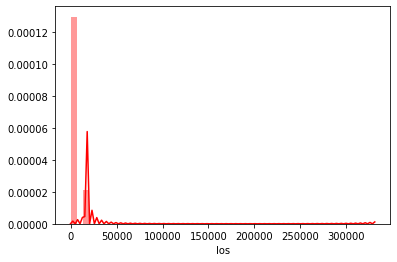

In [14]:
sns.distplot(data_train.los, label = "2^" ,color = 'r')

In [15]:
data_train.head()

,MSISDN,los,rchg_rev,rchg_trx,voice_rev,voice_trx,voice_mou,voice_dou,sms_rev,sms_trx,...,broadband_usg,broadband_dou,digital_rev,digital_trx,digital_dou,voice_package_rev,voice_package_trx,voice_package_dou,package_last_purchase,lapsed_flag
0,1,1175,30000,3,11637.0,114,121,6,1480,21,...,6.804641,7,660.0,5,2,7500,3,2,2,0
1,2,17044,10000,1,8073.0,11,3,4,620,3,...,0.002163,2,0.0,0,0,2500,1,1,3,1
2,4,943,50000,1,17434.0,72,149,7,5245,32,...,0.000000,0,0.0,0,0,19550,5,5,2,0
3,5,2319,30000,4,4583.0,13,104,5,5495,28,...,0.000000,0,0.0,0,0,12800,3,2,2,0
4,6,975,0,0,2390.0,9,15,3,3010,16,...,0.000000,0,165.0,1,1,4100,1,1,4,1


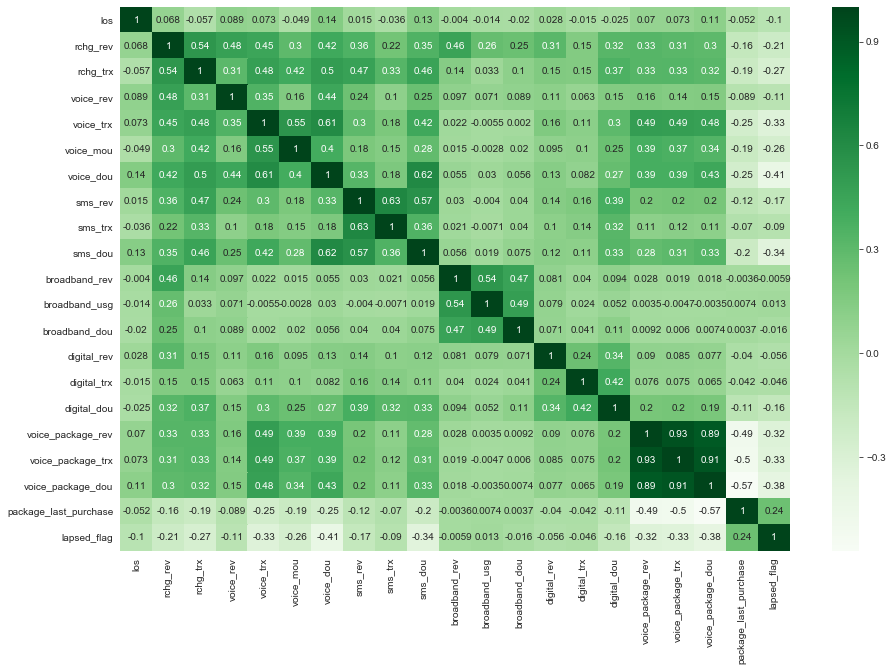

In [64]:
plt.figure(figsize = [15, 10])
sns.heatmap(data_train.drop(columns = ['MSISDN']).corr(), annot = True, cmap = 'Greens')

In [69]:
describe_train = data_train.drop(columns = ['MSISDN', 'lapsed_flag']).describe()
describe_train.transpose().to_csv('D:/traindescribe.csv')

## Modelling Section

### Pendefinisian X dan Y

In [16]:
X_train = data_train.drop(columns = ['MSISDN', 'lapsed_flag'])
X_train.shape

(70000, 20)

In [17]:
X_test = data_test.drop(columns = ['MSISDN'])
X_test.shape

(30000, 20)

In [18]:
Y_train = data_train[['lapsed_flag']]
Y_train.head()

,lapsed_flag
0,0
1,1
2,0
3,0
4,1


In [19]:
import sklearn

In [20]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [ ]:
methods = [AdaBoostClassifier(random_state = 2),
         RandomForestClassifier(random_state = 2), 
         GradientBoostingClassifier(random_state = 2), 
         LogisticRegression(), 
         SVC(),
         LGBMClassifier(random_state = 2), 
         XGBClassifier(random_state = 2)]


classifier = ['AdaBoost', 'RandomForest', 'GradientBoosting', 'LogisticRegression', 'SVC', 'LGBMClassifier', 'XGBClassifier']
cv_score = []
for method in methods :
    cv_score.append(cross_val_score(method, X_train, Y_train, scoring = 'accuracy', cv = KFold(5)).mean())

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [ ]:
dict_hasil = {'Method' : classifier, 'CV_Score' : cv_score}
pd.DataFrame(dict_hasil)

### Cross Validation Section

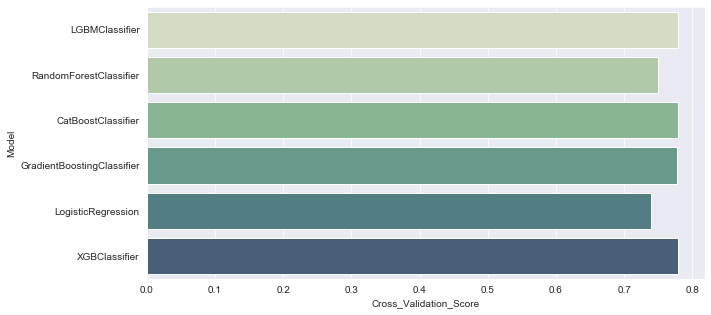

In [75]:
method = ['LGBMClassifier', 'RandomForestClassifier', 'CatBoostClassifier', 
         'GradientBoostingClassifier', 'LogisticRegression', 'XGBClassifier']
cv = [0.7782285714285715, 
     0.7490142857142857, 
     0.7789857142857143,
     0.7779428571428572, 
     0.7393000000000001,
     0.7783285714285715]
dict_hasil = {'Model' : method, 'Cross_Validation_Score' : cv}
df_hasil = pd.DataFrame(dict_hasil)
plt.figure(figsize = [10, 5])
sns.barplot(x = 'Cross_Validation_Score', y = 'Model', data = df_hasil, palette = sns.cubehelix_palette(8, start=.5, rot=-.75))

In [47]:
cross_val_score(LGBMClassifier(random_state = 2), X_train, Y_train, cv = KFold(5), scoring = 'accuracy').mean()

0.7782285714285715

In [76]:
cross_val_score(LGBMClassifier(random_state = 2), X_train, Y_train, cv = KFold(5), scoring = 'roc_auc').mean()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8447533795789216

In [77]:
cross_val_score(XGBClassifier(random_state = 2), X_train, Y_train, cv = KFold(5), scoring = 'roc_auc').mean()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8432650114283197

In [53]:
cross_val_score(RandomForestClassifier(random_state = 2), X_train, Y_train, cv = KFold(5), scoring = 'accuracy').mean()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  esti

0.7490142857142857

In [48]:
cross_val_score(CatBoostClassifier(random_state = 2), X_train, Y_train, cv = KFold(5), scoring = 'accuracy').mean()

Learning rate set to 0.052343
0:	learn: 0.6646041	total: 16.5ms	remaining: 16.5s
1:	learn: 0.6390997	total: 33.4ms	remaining: 16.7s
2:	learn: 0.6197724	total: 49.7ms	remaining: 16.5s
3:	learn: 0.6003403	total: 66.3ms	remaining: 16.5s
4:	learn: 0.5852249	total: 82.8ms	remaining: 16.5s
5:	learn: 0.5703676	total: 99.6ms	remaining: 16.5s
6:	learn: 0.5579786	total: 116ms	remaining: 16.5s
7:	learn: 0.5460332	total: 133ms	remaining: 16.5s
8:	learn: 0.5358340	total: 148ms	remaining: 16.3s
9:	learn: 0.5275841	total: 165ms	remaining: 16.3s
10:	learn: 0.5206995	total: 182ms	remaining: 16.4s
11:	learn: 0.5137337	total: 215ms	remaining: 17.7s
12:	learn: 0.5079982	total: 232ms	remaining: 17.6s
13:	learn: 0.5030456	total: 249ms	remaining: 17.5s
14:	learn: 0.4979622	total: 265ms	remaining: 17.4s
15:	learn: 0.4937185	total: 281ms	remaining: 17.3s
16:	learn: 0.4898933	total: 297ms	remaining: 17.2s
17:	learn: 0.4863919	total: 314ms	remaining: 17.1s
18:	learn: 0.4831906	total: 331ms	remaining: 17.1s
19:	l

165:	learn: 0.4360380	total: 2.98s	remaining: 15s
166:	learn: 0.4359419	total: 3s	remaining: 15s
167:	learn: 0.4358541	total: 3.02s	remaining: 15s
168:	learn: 0.4357867	total: 3.04s	remaining: 14.9s
169:	learn: 0.4356886	total: 3.05s	remaining: 14.9s
170:	learn: 0.4356475	total: 3.07s	remaining: 14.9s
171:	learn: 0.4355584	total: 3.09s	remaining: 14.9s
172:	learn: 0.4354981	total: 3.1s	remaining: 14.8s
173:	learn: 0.4354239	total: 3.12s	remaining: 14.8s
174:	learn: 0.4353656	total: 3.13s	remaining: 14.8s
175:	learn: 0.4352802	total: 3.15s	remaining: 14.8s
176:	learn: 0.4351879	total: 3.17s	remaining: 14.7s
177:	learn: 0.4350955	total: 3.19s	remaining: 14.7s
178:	learn: 0.4350459	total: 3.21s	remaining: 14.7s
179:	learn: 0.4349769	total: 3.23s	remaining: 14.7s
180:	learn: 0.4349064	total: 3.24s	remaining: 14.7s
181:	learn: 0.4348561	total: 3.26s	remaining: 14.7s
182:	learn: 0.4347452	total: 3.28s	remaining: 14.6s
183:	learn: 0.4346539	total: 3.29s	remaining: 14.6s
184:	learn: 0.4346109	

331:	learn: 0.4236723	total: 5.9s	remaining: 11.9s
332:	learn: 0.4236277	total: 5.92s	remaining: 11.9s
333:	learn: 0.4235545	total: 5.93s	remaining: 11.8s
334:	learn: 0.4234944	total: 5.95s	remaining: 11.8s
335:	learn: 0.4234106	total: 5.97s	remaining: 11.8s
336:	learn: 0.4233528	total: 5.99s	remaining: 11.8s
337:	learn: 0.4232961	total: 6s	remaining: 11.8s
338:	learn: 0.4232350	total: 6.02s	remaining: 11.7s
339:	learn: 0.4231707	total: 6.03s	remaining: 11.7s
340:	learn: 0.4231011	total: 6.05s	remaining: 11.7s
341:	learn: 0.4230690	total: 6.07s	remaining: 11.7s
342:	learn: 0.4229953	total: 6.08s	remaining: 11.7s
343:	learn: 0.4229394	total: 6.11s	remaining: 11.6s
344:	learn: 0.4228539	total: 6.12s	remaining: 11.6s
345:	learn: 0.4227633	total: 6.14s	remaining: 11.6s
346:	learn: 0.4226584	total: 6.16s	remaining: 11.6s
347:	learn: 0.4225929	total: 6.17s	remaining: 11.6s
348:	learn: 0.4225133	total: 6.19s	remaining: 11.5s
349:	learn: 0.4224285	total: 6.21s	remaining: 11.5s
350:	learn: 0.42

491:	learn: 0.4137913	total: 9.06s	remaining: 9.36s
492:	learn: 0.4137367	total: 9.09s	remaining: 9.35s
493:	learn: 0.4136869	total: 9.11s	remaining: 9.33s
494:	learn: 0.4136231	total: 9.13s	remaining: 9.31s
495:	learn: 0.4135469	total: 9.15s	remaining: 9.29s
496:	learn: 0.4134900	total: 9.16s	remaining: 9.27s
497:	learn: 0.4134467	total: 9.18s	remaining: 9.25s
498:	learn: 0.4134127	total: 9.19s	remaining: 9.23s
499:	learn: 0.4133692	total: 9.21s	remaining: 9.21s
500:	learn: 0.4133079	total: 9.22s	remaining: 9.19s
501:	learn: 0.4132548	total: 9.24s	remaining: 9.17s
502:	learn: 0.4131910	total: 9.26s	remaining: 9.15s
503:	learn: 0.4131252	total: 9.28s	remaining: 9.14s
504:	learn: 0.4130825	total: 9.3s	remaining: 9.12s
505:	learn: 0.4130401	total: 9.32s	remaining: 9.1s
506:	learn: 0.4129820	total: 9.34s	remaining: 9.08s
507:	learn: 0.4129439	total: 9.35s	remaining: 9.06s
508:	learn: 0.4128620	total: 9.37s	remaining: 9.04s
509:	learn: 0.4128107	total: 9.4s	remaining: 9.03s
510:	learn: 0.4

651:	learn: 0.4055689	total: 12.5s	remaining: 6.66s
652:	learn: 0.4055172	total: 12.5s	remaining: 6.64s
653:	learn: 0.4054637	total: 12.5s	remaining: 6.62s
654:	learn: 0.4054158	total: 12.5s	remaining: 6.6s
655:	learn: 0.4053724	total: 12.6s	remaining: 6.59s
656:	learn: 0.4053255	total: 12.6s	remaining: 6.57s
657:	learn: 0.4052700	total: 12.6s	remaining: 6.55s
658:	learn: 0.4052131	total: 12.6s	remaining: 6.54s
659:	learn: 0.4051823	total: 12.7s	remaining: 6.52s
660:	learn: 0.4051497	total: 12.7s	remaining: 6.5s
661:	learn: 0.4050975	total: 12.7s	remaining: 6.48s
662:	learn: 0.4050354	total: 12.7s	remaining: 6.46s
663:	learn: 0.4049681	total: 12.7s	remaining: 6.44s
664:	learn: 0.4049291	total: 12.7s	remaining: 6.42s
665:	learn: 0.4048578	total: 12.8s	remaining: 6.4s
666:	learn: 0.4047892	total: 12.8s	remaining: 6.39s
667:	learn: 0.4047391	total: 12.8s	remaining: 6.37s
668:	learn: 0.4046792	total: 12.8s	remaining: 6.35s
669:	learn: 0.4046049	total: 12.9s	remaining: 6.33s
670:	learn: 0.4

812:	learn: 0.3981263	total: 15.4s	remaining: 3.55s
813:	learn: 0.3980616	total: 15.4s	remaining: 3.53s
814:	learn: 0.3980287	total: 15.5s	remaining: 3.51s
815:	learn: 0.3980101	total: 15.5s	remaining: 3.49s
816:	learn: 0.3979886	total: 15.5s	remaining: 3.47s
817:	learn: 0.3979583	total: 15.5s	remaining: 3.45s
818:	learn: 0.3979277	total: 15.5s	remaining: 3.43s
819:	learn: 0.3979037	total: 15.5s	remaining: 3.41s
820:	learn: 0.3978782	total: 15.5s	remaining: 3.39s
821:	learn: 0.3978217	total: 15.6s	remaining: 3.37s
822:	learn: 0.3977737	total: 15.6s	remaining: 3.35s
823:	learn: 0.3977445	total: 15.6s	remaining: 3.33s
824:	learn: 0.3976972	total: 15.6s	remaining: 3.31s
825:	learn: 0.3976426	total: 15.6s	remaining: 3.29s
826:	learn: 0.3976182	total: 15.7s	remaining: 3.28s
827:	learn: 0.3975709	total: 15.7s	remaining: 3.26s
828:	learn: 0.3975322	total: 15.7s	remaining: 3.24s
829:	learn: 0.3975035	total: 15.7s	remaining: 3.22s
830:	learn: 0.3974440	total: 15.7s	remaining: 3.2s
831:	learn: 0

981:	learn: 0.3911275	total: 18.3s	remaining: 336ms
982:	learn: 0.3910780	total: 18.4s	remaining: 317ms
983:	learn: 0.3910346	total: 18.4s	remaining: 299ms
984:	learn: 0.3910021	total: 18.4s	remaining: 280ms
985:	learn: 0.3909528	total: 18.4s	remaining: 261ms
986:	learn: 0.3909020	total: 18.4s	remaining: 243ms
987:	learn: 0.3908646	total: 18.4s	remaining: 224ms
988:	learn: 0.3908048	total: 18.5s	remaining: 205ms
989:	learn: 0.3907685	total: 18.5s	remaining: 187ms
990:	learn: 0.3907252	total: 18.5s	remaining: 168ms
991:	learn: 0.3906987	total: 18.5s	remaining: 149ms
992:	learn: 0.3906741	total: 18.5s	remaining: 131ms
993:	learn: 0.3906360	total: 18.5s	remaining: 112ms
994:	learn: 0.3905912	total: 18.6s	remaining: 93.3ms
995:	learn: 0.3905621	total: 18.6s	remaining: 74.6ms
996:	learn: 0.3905091	total: 18.6s	remaining: 55.9ms
997:	learn: 0.3904716	total: 18.6s	remaining: 37.3ms
998:	learn: 0.3904302	total: 18.6s	remaining: 18.6ms
999:	learn: 0.3903828	total: 18.6s	remaining: 0us
Learning 

148:	learn: 0.4384509	total: 2.74s	remaining: 15.6s
149:	learn: 0.4383841	total: 2.75s	remaining: 15.6s
150:	learn: 0.4382792	total: 2.77s	remaining: 15.6s
151:	learn: 0.4381994	total: 2.8s	remaining: 15.6s
152:	learn: 0.4381054	total: 2.82s	remaining: 15.6s
153:	learn: 0.4380327	total: 2.85s	remaining: 15.6s
154:	learn: 0.4379398	total: 2.87s	remaining: 15.6s
155:	learn: 0.4378572	total: 2.89s	remaining: 15.7s
156:	learn: 0.4377798	total: 2.91s	remaining: 15.7s
157:	learn: 0.4376959	total: 2.94s	remaining: 15.6s
158:	learn: 0.4376059	total: 2.96s	remaining: 15.7s
159:	learn: 0.4375242	total: 2.98s	remaining: 15.6s
160:	learn: 0.4374525	total: 3s	remaining: 15.6s
161:	learn: 0.4373791	total: 3.01s	remaining: 15.6s
162:	learn: 0.4372777	total: 3.03s	remaining: 15.6s
163:	learn: 0.4372101	total: 3.05s	remaining: 15.5s
164:	learn: 0.4371294	total: 3.07s	remaining: 15.5s
165:	learn: 0.4370807	total: 3.1s	remaining: 15.6s
166:	learn: 0.4370140	total: 3.12s	remaining: 15.6s
167:	learn: 0.436

313:	learn: 0.4259466	total: 6.14s	remaining: 13.4s
314:	learn: 0.4258627	total: 6.17s	remaining: 13.4s
315:	learn: 0.4258003	total: 6.19s	remaining: 13.4s
316:	learn: 0.4257196	total: 6.21s	remaining: 13.4s
317:	learn: 0.4256670	total: 6.24s	remaining: 13.4s
318:	learn: 0.4256083	total: 6.26s	remaining: 13.4s
319:	learn: 0.4255452	total: 6.29s	remaining: 13.4s
320:	learn: 0.4254801	total: 6.31s	remaining: 13.3s
321:	learn: 0.4254084	total: 6.33s	remaining: 13.3s
322:	learn: 0.4253450	total: 6.35s	remaining: 13.3s
323:	learn: 0.4252444	total: 6.37s	remaining: 13.3s
324:	learn: 0.4251625	total: 6.4s	remaining: 13.3s
325:	learn: 0.4250898	total: 6.42s	remaining: 13.3s
326:	learn: 0.4250286	total: 6.44s	remaining: 13.3s
327:	learn: 0.4249589	total: 6.47s	remaining: 13.3s
328:	learn: 0.4248933	total: 6.49s	remaining: 13.2s
329:	learn: 0.4247772	total: 6.52s	remaining: 13.2s
330:	learn: 0.4247373	total: 6.54s	remaining: 13.2s
331:	learn: 0.4246764	total: 6.56s	remaining: 13.2s
332:	learn: 0

480:	learn: 0.4156389	total: 9.34s	remaining: 10.1s
481:	learn: 0.4155929	total: 9.36s	remaining: 10.1s
482:	learn: 0.4155491	total: 9.37s	remaining: 10s
483:	learn: 0.4155005	total: 9.39s	remaining: 10s
484:	learn: 0.4154310	total: 9.4s	remaining: 9.99s
485:	learn: 0.4153547	total: 9.42s	remaining: 9.96s
486:	learn: 0.4153318	total: 9.44s	remaining: 9.94s
487:	learn: 0.4152918	total: 9.46s	remaining: 9.93s
488:	learn: 0.4152551	total: 9.49s	remaining: 9.92s
489:	learn: 0.4152030	total: 9.52s	remaining: 9.9s
490:	learn: 0.4151235	total: 9.54s	remaining: 9.89s
491:	learn: 0.4150397	total: 9.56s	remaining: 9.87s
492:	learn: 0.4149824	total: 9.58s	remaining: 9.85s
493:	learn: 0.4149174	total: 9.6s	remaining: 9.83s
494:	learn: 0.4148758	total: 9.61s	remaining: 9.81s
495:	learn: 0.4148365	total: 9.63s	remaining: 9.78s
496:	learn: 0.4147820	total: 9.64s	remaining: 9.76s
497:	learn: 0.4147132	total: 9.66s	remaining: 9.74s
498:	learn: 0.4146857	total: 9.68s	remaining: 9.72s
499:	learn: 0.41461

643:	learn: 0.4068078	total: 12.4s	remaining: 6.87s
644:	learn: 0.4067401	total: 12.5s	remaining: 6.86s
645:	learn: 0.4066898	total: 12.5s	remaining: 6.83s
646:	learn: 0.4066738	total: 12.5s	remaining: 6.82s
647:	learn: 0.4066522	total: 12.5s	remaining: 6.8s
648:	learn: 0.4066135	total: 12.5s	remaining: 6.78s
649:	learn: 0.4065622	total: 12.6s	remaining: 6.76s
650:	learn: 0.4065172	total: 12.6s	remaining: 6.74s
651:	learn: 0.4064786	total: 12.6s	remaining: 6.72s
652:	learn: 0.4064328	total: 12.6s	remaining: 6.7s
653:	learn: 0.4063921	total: 12.6s	remaining: 6.68s
654:	learn: 0.4063379	total: 12.7s	remaining: 6.67s
655:	learn: 0.4062751	total: 12.7s	remaining: 6.65s
656:	learn: 0.4062284	total: 12.7s	remaining: 6.63s
657:	learn: 0.4061646	total: 12.7s	remaining: 6.61s
658:	learn: 0.4061285	total: 12.7s	remaining: 6.59s
659:	learn: 0.4060675	total: 12.8s	remaining: 6.57s
660:	learn: 0.4060045	total: 12.8s	remaining: 6.55s
661:	learn: 0.4059643	total: 12.8s	remaining: 6.53s
662:	learn: 0.

809:	learn: 0.3984476	total: 16s	remaining: 3.76s
810:	learn: 0.3983947	total: 16.1s	remaining: 3.74s
811:	learn: 0.3983585	total: 16.1s	remaining: 3.72s
812:	learn: 0.3983206	total: 16.1s	remaining: 3.7s
813:	learn: 0.3982731	total: 16.1s	remaining: 3.68s
814:	learn: 0.3982011	total: 16.1s	remaining: 3.66s
815:	learn: 0.3981578	total: 16.2s	remaining: 3.64s
816:	learn: 0.3980973	total: 16.2s	remaining: 3.62s
817:	learn: 0.3980190	total: 16.2s	remaining: 3.6s
818:	learn: 0.3979674	total: 16.2s	remaining: 3.58s
819:	learn: 0.3978930	total: 16.2s	remaining: 3.56s
820:	learn: 0.3978318	total: 16.3s	remaining: 3.54s
821:	learn: 0.3977729	total: 16.3s	remaining: 3.52s
822:	learn: 0.3976981	total: 16.3s	remaining: 3.5s
823:	learn: 0.3976462	total: 16.3s	remaining: 3.49s
824:	learn: 0.3976349	total: 16.3s	remaining: 3.47s
825:	learn: 0.3975754	total: 16.4s	remaining: 3.45s
826:	learn: 0.3975021	total: 16.4s	remaining: 3.43s
827:	learn: 0.3974607	total: 16.4s	remaining: 3.41s
828:	learn: 0.397

968:	learn: 0.3910717	total: 19.5s	remaining: 624ms
969:	learn: 0.3910197	total: 19.5s	remaining: 604ms
970:	learn: 0.3909763	total: 19.6s	remaining: 584ms
971:	learn: 0.3909463	total: 19.6s	remaining: 564ms
972:	learn: 0.3909209	total: 19.6s	remaining: 544ms
973:	learn: 0.3908783	total: 19.6s	remaining: 524ms
974:	learn: 0.3908573	total: 19.6s	remaining: 504ms
975:	learn: 0.3907930	total: 19.7s	remaining: 484ms
976:	learn: 0.3907351	total: 19.7s	remaining: 464ms
977:	learn: 0.3907010	total: 19.7s	remaining: 443ms
978:	learn: 0.3906581	total: 19.7s	remaining: 423ms
979:	learn: 0.3906033	total: 19.8s	remaining: 403ms
980:	learn: 0.3905722	total: 19.8s	remaining: 383ms
981:	learn: 0.3905356	total: 19.8s	remaining: 363ms
982:	learn: 0.3904776	total: 19.8s	remaining: 343ms
983:	learn: 0.3904559	total: 19.8s	remaining: 322ms
984:	learn: 0.3903948	total: 19.9s	remaining: 302ms
985:	learn: 0.3903517	total: 19.9s	remaining: 282ms
986:	learn: 0.3903033	total: 19.9s	remaining: 262ms
987:	learn: 

129:	learn: 0.4396360	total: 2.8s	remaining: 18.7s
130:	learn: 0.4395297	total: 2.82s	remaining: 18.7s
131:	learn: 0.4394272	total: 2.85s	remaining: 18.7s
132:	learn: 0.4393550	total: 2.87s	remaining: 18.7s
133:	learn: 0.4392362	total: 2.9s	remaining: 18.7s
134:	learn: 0.4391674	total: 2.92s	remaining: 18.7s
135:	learn: 0.4390726	total: 2.94s	remaining: 18.7s
136:	learn: 0.4390252	total: 2.96s	remaining: 18.7s
137:	learn: 0.4389121	total: 2.99s	remaining: 18.7s
138:	learn: 0.4387941	total: 3.01s	remaining: 18.7s
139:	learn: 0.4386625	total: 3.04s	remaining: 18.7s
140:	learn: 0.4385878	total: 3.06s	remaining: 18.6s
141:	learn: 0.4385342	total: 3.08s	remaining: 18.6s
142:	learn: 0.4384259	total: 3.1s	remaining: 18.6s
143:	learn: 0.4383114	total: 3.12s	remaining: 18.6s
144:	learn: 0.4382311	total: 3.14s	remaining: 18.5s
145:	learn: 0.4381676	total: 3.17s	remaining: 18.5s
146:	learn: 0.4381161	total: 3.19s	remaining: 18.5s
147:	learn: 0.4380221	total: 3.21s	remaining: 18.5s
148:	learn: 0.4

288:	learn: 0.4268329	total: 6.27s	remaining: 15.4s
289:	learn: 0.4267705	total: 6.3s	remaining: 15.4s
290:	learn: 0.4266731	total: 6.32s	remaining: 15.4s
291:	learn: 0.4266395	total: 6.34s	remaining: 15.4s
292:	learn: 0.4265802	total: 6.37s	remaining: 15.4s
293:	learn: 0.4265290	total: 6.39s	remaining: 15.3s
294:	learn: 0.4264773	total: 6.41s	remaining: 15.3s
295:	learn: 0.4264008	total: 6.42s	remaining: 15.3s
296:	learn: 0.4263506	total: 6.44s	remaining: 15.2s
297:	learn: 0.4262601	total: 6.46s	remaining: 15.2s
298:	learn: 0.4261914	total: 6.48s	remaining: 15.2s
299:	learn: 0.4261294	total: 6.51s	remaining: 15.2s
300:	learn: 0.4261243	total: 6.53s	remaining: 15.2s
301:	learn: 0.4260675	total: 6.56s	remaining: 15.2s
302:	learn: 0.4259826	total: 6.58s	remaining: 15.1s
303:	learn: 0.4258940	total: 6.61s	remaining: 15.1s
304:	learn: 0.4258003	total: 6.63s	remaining: 15.1s
305:	learn: 0.4257520	total: 6.65s	remaining: 15.1s
306:	learn: 0.4256576	total: 6.67s	remaining: 15.1s
307:	learn: 0

448:	learn: 0.4164619	total: 9.71s	remaining: 11.9s
449:	learn: 0.4164042	total: 9.74s	remaining: 11.9s
450:	learn: 0.4163185	total: 9.77s	remaining: 11.9s
451:	learn: 0.4162384	total: 9.79s	remaining: 11.9s
452:	learn: 0.4161870	total: 9.81s	remaining: 11.8s
453:	learn: 0.4161199	total: 9.83s	remaining: 11.8s
454:	learn: 0.4160745	total: 9.85s	remaining: 11.8s
455:	learn: 0.4160606	total: 9.88s	remaining: 11.8s
456:	learn: 0.4159977	total: 9.9s	remaining: 11.8s
457:	learn: 0.4159168	total: 9.92s	remaining: 11.7s
458:	learn: 0.4158344	total: 9.95s	remaining: 11.7s
459:	learn: 0.4157901	total: 9.96s	remaining: 11.7s
460:	learn: 0.4157562	total: 9.98s	remaining: 11.7s
461:	learn: 0.4156994	total: 10s	remaining: 11.6s
462:	learn: 0.4156358	total: 10s	remaining: 11.6s
463:	learn: 0.4155560	total: 10s	remaining: 11.6s
464:	learn: 0.4154867	total: 10.1s	remaining: 11.6s
465:	learn: 0.4154702	total: 10.1s	remaining: 11.6s
466:	learn: 0.4154051	total: 10.1s	remaining: 11.5s
467:	learn: 0.41536

614:	learn: 0.4072820	total: 13.1s	remaining: 8.19s
615:	learn: 0.4072300	total: 13.1s	remaining: 8.17s
616:	learn: 0.4071892	total: 13.1s	remaining: 8.15s
617:	learn: 0.4071316	total: 13.2s	remaining: 8.13s
618:	learn: 0.4070775	total: 13.2s	remaining: 8.11s
619:	learn: 0.4070026	total: 13.2s	remaining: 8.09s
620:	learn: 0.4069409	total: 13.2s	remaining: 8.07s
621:	learn: 0.4069112	total: 13.3s	remaining: 8.05s
622:	learn: 0.4068538	total: 13.3s	remaining: 8.03s
623:	learn: 0.4068026	total: 13.3s	remaining: 8.01s
624:	learn: 0.4067593	total: 13.3s	remaining: 7.99s
625:	learn: 0.4067012	total: 13.3s	remaining: 7.97s
626:	learn: 0.4066673	total: 13.4s	remaining: 7.94s
627:	learn: 0.4066119	total: 13.4s	remaining: 7.92s
628:	learn: 0.4066019	total: 13.4s	remaining: 7.9s
629:	learn: 0.4065385	total: 13.4s	remaining: 7.87s
630:	learn: 0.4064898	total: 13.4s	remaining: 7.85s
631:	learn: 0.4064381	total: 13.4s	remaining: 7.83s
632:	learn: 0.4063736	total: 13.5s	remaining: 7.81s
633:	learn: 0

776:	learn: 0.3993589	total: 16.7s	remaining: 4.8s
777:	learn: 0.3993092	total: 16.7s	remaining: 4.77s
778:	learn: 0.3992762	total: 16.8s	remaining: 4.75s
779:	learn: 0.3992287	total: 16.8s	remaining: 4.73s
780:	learn: 0.3991731	total: 16.8s	remaining: 4.71s
781:	learn: 0.3991226	total: 16.8s	remaining: 4.69s
782:	learn: 0.3990706	total: 16.8s	remaining: 4.67s
783:	learn: 0.3990401	total: 16.9s	remaining: 4.64s
784:	learn: 0.3989594	total: 16.9s	remaining: 4.62s
785:	learn: 0.3988977	total: 16.9s	remaining: 4.6s
786:	learn: 0.3988611	total: 16.9s	remaining: 4.58s
787:	learn: 0.3988140	total: 17s	remaining: 4.56s
788:	learn: 0.3987968	total: 17s	remaining: 4.54s
789:	learn: 0.3987370	total: 17s	remaining: 4.52s
790:	learn: 0.3986755	total: 17s	remaining: 4.5s
791:	learn: 0.3986237	total: 17s	remaining: 4.47s
792:	learn: 0.3985715	total: 17s	remaining: 4.45s
793:	learn: 0.3985268	total: 17.1s	remaining: 4.43s
794:	learn: 0.3984887	total: 17.1s	remaining: 4.41s
795:	learn: 0.3984424	total

943:	learn: 0.3916111	total: 20.4s	remaining: 1.21s
944:	learn: 0.3915897	total: 20.4s	remaining: 1.19s
945:	learn: 0.3915656	total: 20.4s	remaining: 1.16s
946:	learn: 0.3915194	total: 20.4s	remaining: 1.14s
947:	learn: 0.3914470	total: 20.4s	remaining: 1.12s
948:	learn: 0.3913887	total: 20.5s	remaining: 1.1s
949:	learn: 0.3913292	total: 20.5s	remaining: 1.08s
950:	learn: 0.3913130	total: 20.5s	remaining: 1.06s
951:	learn: 0.3912613	total: 20.5s	remaining: 1.03s
952:	learn: 0.3912189	total: 20.5s	remaining: 1.01s
953:	learn: 0.3911809	total: 20.6s	remaining: 991ms
954:	learn: 0.3911213	total: 20.6s	remaining: 970ms
955:	learn: 0.3910724	total: 20.6s	remaining: 948ms
956:	learn: 0.3910207	total: 20.6s	remaining: 927ms
957:	learn: 0.3909877	total: 20.7s	remaining: 905ms
958:	learn: 0.3909418	total: 20.7s	remaining: 884ms
959:	learn: 0.3908817	total: 20.7s	remaining: 862ms
960:	learn: 0.3908303	total: 20.7s	remaining: 841ms
961:	learn: 0.3907761	total: 20.7s	remaining: 819ms
962:	learn: 0

109:	learn: 0.4413146	total: 2.39s	remaining: 19.3s
110:	learn: 0.4411852	total: 2.41s	remaining: 19.3s
111:	learn: 0.4410815	total: 2.42s	remaining: 19.2s
112:	learn: 0.4409824	total: 2.45s	remaining: 19.2s
113:	learn: 0.4408865	total: 2.47s	remaining: 19.2s
114:	learn: 0.4407724	total: 2.5s	remaining: 19.2s
115:	learn: 0.4406423	total: 2.52s	remaining: 19.2s
116:	learn: 0.4405283	total: 2.54s	remaining: 19.2s
117:	learn: 0.4404341	total: 2.57s	remaining: 19.2s
118:	learn: 0.4402916	total: 2.59s	remaining: 19.2s
119:	learn: 0.4401804	total: 2.61s	remaining: 19.2s
120:	learn: 0.4400974	total: 2.63s	remaining: 19.1s
121:	learn: 0.4399866	total: 2.65s	remaining: 19.1s
122:	learn: 0.4399264	total: 2.66s	remaining: 19s
123:	learn: 0.4397951	total: 2.68s	remaining: 19s
124:	learn: 0.4397157	total: 2.7s	remaining: 18.9s
125:	learn: 0.4396343	total: 2.72s	remaining: 18.8s
126:	learn: 0.4395451	total: 2.74s	remaining: 18.9s
127:	learn: 0.4394562	total: 2.77s	remaining: 18.9s
128:	learn: 0.4393

279:	learn: 0.4275024	total: 5.82s	remaining: 15s
280:	learn: 0.4274192	total: 5.83s	remaining: 14.9s
281:	learn: 0.4273513	total: 5.85s	remaining: 14.9s
282:	learn: 0.4272583	total: 5.87s	remaining: 14.9s
283:	learn: 0.4271577	total: 5.88s	remaining: 14.8s
284:	learn: 0.4271003	total: 5.9s	remaining: 14.8s
285:	learn: 0.4270198	total: 5.92s	remaining: 14.8s
286:	learn: 0.4269441	total: 5.94s	remaining: 14.7s
287:	learn: 0.4268912	total: 5.95s	remaining: 14.7s
288:	learn: 0.4268467	total: 5.97s	remaining: 14.7s
289:	learn: 0.4267783	total: 5.99s	remaining: 14.7s
290:	learn: 0.4267143	total: 6s	remaining: 14.6s
291:	learn: 0.4266578	total: 6.03s	remaining: 14.6s
292:	learn: 0.4265991	total: 6.05s	remaining: 14.6s
293:	learn: 0.4265208	total: 6.06s	remaining: 14.6s
294:	learn: 0.4264438	total: 6.08s	remaining: 14.5s
295:	learn: 0.4263555	total: 6.1s	remaining: 14.5s
296:	learn: 0.4262910	total: 6.12s	remaining: 14.5s
297:	learn: 0.4262253	total: 6.14s	remaining: 14.5s
298:	learn: 0.42615

445:	learn: 0.4163628	total: 8.79s	remaining: 10.9s
446:	learn: 0.4162675	total: 8.81s	remaining: 10.9s
447:	learn: 0.4162268	total: 8.83s	remaining: 10.9s
448:	learn: 0.4161894	total: 8.85s	remaining: 10.9s
449:	learn: 0.4161349	total: 8.88s	remaining: 10.9s
450:	learn: 0.4160884	total: 8.9s	remaining: 10.8s
451:	learn: 0.4160377	total: 8.91s	remaining: 10.8s
452:	learn: 0.4159823	total: 8.93s	remaining: 10.8s
453:	learn: 0.4159243	total: 8.95s	remaining: 10.8s
454:	learn: 0.4158725	total: 8.96s	remaining: 10.7s
455:	learn: 0.4158283	total: 8.99s	remaining: 10.7s
456:	learn: 0.4157828	total: 9.01s	remaining: 10.7s
457:	learn: 0.4157112	total: 9.03s	remaining: 10.7s
458:	learn: 0.4156751	total: 9.05s	remaining: 10.7s
459:	learn: 0.4156168	total: 9.06s	remaining: 10.6s
460:	learn: 0.4155878	total: 9.08s	remaining: 10.6s
461:	learn: 0.4155282	total: 9.1s	remaining: 10.6s
462:	learn: 0.4154942	total: 9.11s	remaining: 10.6s
463:	learn: 0.4154302	total: 9.13s	remaining: 10.5s
464:	learn: 0.

608:	learn: 0.4080511	total: 11.7s	remaining: 7.51s
609:	learn: 0.4080007	total: 11.7s	remaining: 7.49s
610:	learn: 0.4079636	total: 11.7s	remaining: 7.47s
611:	learn: 0.4079439	total: 11.8s	remaining: 7.45s
612:	learn: 0.4078930	total: 11.8s	remaining: 7.43s
613:	learn: 0.4078197	total: 11.8s	remaining: 7.41s
614:	learn: 0.4077952	total: 11.8s	remaining: 7.39s
615:	learn: 0.4077406	total: 11.8s	remaining: 7.37s
616:	learn: 0.4076876	total: 11.8s	remaining: 7.35s
617:	learn: 0.4076227	total: 11.9s	remaining: 7.33s
618:	learn: 0.4075715	total: 11.9s	remaining: 7.31s
619:	learn: 0.4074974	total: 11.9s	remaining: 7.29s
620:	learn: 0.4074576	total: 11.9s	remaining: 7.27s
621:	learn: 0.4074046	total: 11.9s	remaining: 7.25s
622:	learn: 0.4073444	total: 12s	remaining: 7.23s
623:	learn: 0.4073122	total: 12s	remaining: 7.21s
624:	learn: 0.4072650	total: 12s	remaining: 7.19s
625:	learn: 0.4072128	total: 12s	remaining: 7.17s
626:	learn: 0.4071658	total: 12s	remaining: 7.15s
627:	learn: 0.4071152	

773:	learn: 0.3999631	total: 14.7s	remaining: 4.28s
774:	learn: 0.3999181	total: 14.7s	remaining: 4.26s
775:	learn: 0.3998784	total: 14.7s	remaining: 4.25s
776:	learn: 0.3998668	total: 14.7s	remaining: 4.23s
777:	learn: 0.3998302	total: 14.7s	remaining: 4.21s
778:	learn: 0.3997952	total: 14.8s	remaining: 4.19s
779:	learn: 0.3997660	total: 14.8s	remaining: 4.17s
780:	learn: 0.3997433	total: 14.8s	remaining: 4.15s
781:	learn: 0.3997116	total: 14.8s	remaining: 4.13s
782:	learn: 0.3996527	total: 14.8s	remaining: 4.11s
783:	learn: 0.3996453	total: 14.8s	remaining: 4.09s
784:	learn: 0.3996120	total: 14.9s	remaining: 4.07s
785:	learn: 0.3995871	total: 14.9s	remaining: 4.05s
786:	learn: 0.3995258	total: 14.9s	remaining: 4.03s
787:	learn: 0.3994744	total: 14.9s	remaining: 4.01s
788:	learn: 0.3994157	total: 14.9s	remaining: 4s
789:	learn: 0.3994153	total: 15s	remaining: 3.98s
790:	learn: 0.3993649	total: 15s	remaining: 3.96s
791:	learn: 0.3992913	total: 15s	remaining: 3.94s
792:	learn: 0.3992624

934:	learn: 0.3928744	total: 17.6s	remaining: 1.23s
935:	learn: 0.3928106	total: 17.7s	remaining: 1.21s
936:	learn: 0.3927679	total: 17.7s	remaining: 1.19s
937:	learn: 0.3927345	total: 17.7s	remaining: 1.17s
938:	learn: 0.3927190	total: 17.7s	remaining: 1.15s
939:	learn: 0.3926821	total: 17.8s	remaining: 1.13s
940:	learn: 0.3926642	total: 17.8s	remaining: 1.11s
941:	learn: 0.3926414	total: 17.8s	remaining: 1.09s
942:	learn: 0.3926410	total: 17.8s	remaining: 1.08s
943:	learn: 0.3926014	total: 17.8s	remaining: 1.06s
944:	learn: 0.3925414	total: 17.9s	remaining: 1.04s
945:	learn: 0.3924982	total: 17.9s	remaining: 1.02s
946:	learn: 0.3924696	total: 17.9s	remaining: 1s
947:	learn: 0.3924209	total: 17.9s	remaining: 983ms
948:	learn: 0.3923731	total: 17.9s	remaining: 964ms
949:	learn: 0.3923347	total: 18s	remaining: 945ms
950:	learn: 0.3922866	total: 18s	remaining: 926ms
951:	learn: 0.3922109	total: 18s	remaining: 907ms
952:	learn: 0.3921434	total: 18s	remaining: 888ms
953:	learn: 0.3920944	t

100:	learn: 0.4418897	total: 2.14s	remaining: 19s
101:	learn: 0.4417477	total: 2.17s	remaining: 19.1s
102:	learn: 0.4416572	total: 2.2s	remaining: 19.2s
103:	learn: 0.4415414	total: 2.24s	remaining: 19.3s
104:	learn: 0.4414374	total: 2.27s	remaining: 19.3s
105:	learn: 0.4413205	total: 2.29s	remaining: 19.4s
106:	learn: 0.4411997	total: 2.31s	remaining: 19.3s
107:	learn: 0.4410948	total: 2.33s	remaining: 19.3s
108:	learn: 0.4410007	total: 2.35s	remaining: 19.2s
109:	learn: 0.4408304	total: 2.38s	remaining: 19.2s
110:	learn: 0.4407306	total: 2.4s	remaining: 19.2s
111:	learn: 0.4406188	total: 2.41s	remaining: 19.1s
112:	learn: 0.4404915	total: 2.43s	remaining: 19.1s
113:	learn: 0.4402871	total: 2.45s	remaining: 19.1s
114:	learn: 0.4401603	total: 2.47s	remaining: 19s
115:	learn: 0.4400376	total: 2.49s	remaining: 19s
116:	learn: 0.4399500	total: 2.51s	remaining: 18.9s
117:	learn: 0.4398687	total: 2.52s	remaining: 18.9s
118:	learn: 0.4397718	total: 2.54s	remaining: 18.8s
119:	learn: 0.439695

266:	learn: 0.4280655	total: 5.79s	remaining: 15.9s
267:	learn: 0.4279469	total: 5.83s	remaining: 15.9s
268:	learn: 0.4278798	total: 5.85s	remaining: 15.9s
269:	learn: 0.4277860	total: 5.89s	remaining: 15.9s
270:	learn: 0.4277331	total: 5.91s	remaining: 15.9s
271:	learn: 0.4276590	total: 5.93s	remaining: 15.9s
272:	learn: 0.4276239	total: 5.95s	remaining: 15.8s
273:	learn: 0.4275792	total: 5.97s	remaining: 15.8s
274:	learn: 0.4275508	total: 5.98s	remaining: 15.8s
275:	learn: 0.4274699	total: 6.01s	remaining: 15.8s
276:	learn: 0.4274241	total: 6.03s	remaining: 15.7s
277:	learn: 0.4273509	total: 6.05s	remaining: 15.7s
278:	learn: 0.4273017	total: 6.07s	remaining: 15.7s
279:	learn: 0.4272714	total: 6.09s	remaining: 15.7s
280:	learn: 0.4272005	total: 6.11s	remaining: 15.6s
281:	learn: 0.4271302	total: 6.14s	remaining: 15.6s
282:	learn: 0.4270490	total: 6.16s	remaining: 15.6s
283:	learn: 0.4270046	total: 6.18s	remaining: 15.6s
284:	learn: 0.4269659	total: 6.21s	remaining: 15.6s
285:	learn: 

429:	learn: 0.4178688	total: 9.24s	remaining: 12.3s
430:	learn: 0.4178037	total: 9.26s	remaining: 12.2s
431:	learn: 0.4177039	total: 9.28s	remaining: 12.2s
432:	learn: 0.4176532	total: 9.3s	remaining: 12.2s
433:	learn: 0.4175811	total: 9.32s	remaining: 12.2s
434:	learn: 0.4175229	total: 9.35s	remaining: 12.1s
435:	learn: 0.4174422	total: 9.39s	remaining: 12.1s
436:	learn: 0.4173860	total: 9.42s	remaining: 12.1s
437:	learn: 0.4173537	total: 9.44s	remaining: 12.1s
438:	learn: 0.4172907	total: 9.47s	remaining: 12.1s
439:	learn: 0.4172709	total: 9.49s	remaining: 12.1s
440:	learn: 0.4171754	total: 9.51s	remaining: 12.1s
441:	learn: 0.4171323	total: 9.53s	remaining: 12s
442:	learn: 0.4170721	total: 9.55s	remaining: 12s
443:	learn: 0.4170165	total: 9.56s	remaining: 12s
444:	learn: 0.4169610	total: 9.58s	remaining: 12s
445:	learn: 0.4168854	total: 9.6s	remaining: 11.9s
446:	learn: 0.4168292	total: 9.62s	remaining: 11.9s
447:	learn: 0.4167367	total: 9.63s	remaining: 11.9s
448:	learn: 0.4166883	

590:	learn: 0.4093244	total: 12.6s	remaining: 8.75s
591:	learn: 0.4092634	total: 12.7s	remaining: 8.73s
592:	learn: 0.4092331	total: 12.7s	remaining: 8.72s
593:	learn: 0.4091453	total: 12.7s	remaining: 8.7s
594:	learn: 0.4090610	total: 12.8s	remaining: 8.68s
595:	learn: 0.4090053	total: 12.8s	remaining: 8.66s
596:	learn: 0.4089658	total: 12.8s	remaining: 8.64s
597:	learn: 0.4089300	total: 12.8s	remaining: 8.62s
598:	learn: 0.4089008	total: 12.8s	remaining: 8.6s
599:	learn: 0.4088557	total: 12.9s	remaining: 8.58s
600:	learn: 0.4087839	total: 12.9s	remaining: 8.55s
601:	learn: 0.4087098	total: 12.9s	remaining: 8.53s
602:	learn: 0.4086376	total: 12.9s	remaining: 8.5s
603:	learn: 0.4085751	total: 12.9s	remaining: 8.48s
604:	learn: 0.4085252	total: 12.9s	remaining: 8.45s
605:	learn: 0.4084422	total: 13s	remaining: 8.43s
606:	learn: 0.4084075	total: 13s	remaining: 8.41s
607:	learn: 0.4083306	total: 13s	remaining: 8.38s
608:	learn: 0.4083003	total: 13s	remaining: 8.36s
609:	learn: 0.4082545	t

754:	learn: 0.4009607	total: 16.1s	remaining: 5.23s
755:	learn: 0.4009082	total: 16.2s	remaining: 5.21s
756:	learn: 0.4008456	total: 16.2s	remaining: 5.19s
757:	learn: 0.4008349	total: 16.2s	remaining: 5.17s
758:	learn: 0.4007771	total: 16.2s	remaining: 5.15s
759:	learn: 0.4007603	total: 16.2s	remaining: 5.13s
760:	learn: 0.4007283	total: 16.3s	remaining: 5.11s
761:	learn: 0.4006735	total: 16.3s	remaining: 5.09s
762:	learn: 0.4006069	total: 16.3s	remaining: 5.07s
763:	learn: 0.4005754	total: 16.3s	remaining: 5.05s
764:	learn: 0.4005512	total: 16.4s	remaining: 5.03s
765:	learn: 0.4005176	total: 16.4s	remaining: 5s
766:	learn: 0.4004790	total: 16.4s	remaining: 4.98s
767:	learn: 0.4004251	total: 16.4s	remaining: 4.96s
768:	learn: 0.4003949	total: 16.4s	remaining: 4.93s
769:	learn: 0.4003496	total: 16.4s	remaining: 4.91s
770:	learn: 0.4003103	total: 16.5s	remaining: 4.89s
771:	learn: 0.4002659	total: 16.5s	remaining: 4.87s
772:	learn: 0.4002078	total: 16.5s	remaining: 4.85s
773:	learn: 0.4

920:	learn: 0.3937798	total: 19.8s	remaining: 1.69s
921:	learn: 0.3937439	total: 19.8s	remaining: 1.67s
922:	learn: 0.3937150	total: 19.8s	remaining: 1.65s
923:	learn: 0.3936899	total: 19.8s	remaining: 1.63s
924:	learn: 0.3936611	total: 19.9s	remaining: 1.61s
925:	learn: 0.3936234	total: 19.9s	remaining: 1.59s
926:	learn: 0.3935697	total: 19.9s	remaining: 1.57s
927:	learn: 0.3935148	total: 19.9s	remaining: 1.54s
928:	learn: 0.3934702	total: 19.9s	remaining: 1.52s
929:	learn: 0.3934188	total: 20s	remaining: 1.5s
930:	learn: 0.3933691	total: 20s	remaining: 1.48s
931:	learn: 0.3933081	total: 20s	remaining: 1.46s
932:	learn: 0.3932564	total: 20s	remaining: 1.44s
933:	learn: 0.3932089	total: 20s	remaining: 1.42s
934:	learn: 0.3931679	total: 20.1s	remaining: 1.4s
935:	learn: 0.3931214	total: 20.1s	remaining: 1.37s
936:	learn: 0.3930901	total: 20.1s	remaining: 1.35s
937:	learn: 0.3930505	total: 20.1s	remaining: 1.33s
938:	learn: 0.3929986	total: 20.2s	remaining: 1.31s
939:	learn: 0.3929657	to

0.7789857142857143

In [24]:
cross_val_score(GradientBoostingClassifier(random_state = 2), X_train, Y_train, cv = KFold(5), scoring = 'accuracy').mean()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

0.7779428571428572

In [25]:
cross_val_score(LogisticRegression(), X_train, Y_train, cv = KFold(5), scoring = 'accuracy').mean()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_

0.7393000000000001

In [ ]:
cross_val_score(SVC(), X_train, Y_train, cv = KFold(5), scoring = 'accuracy').mean()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
cross_val_score(XGBClassifier(), X_train, Y_train, cv = KFold(5), scoring = 'accuracy').mean()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7783285714285715

In [87]:
model = LGBMClassifier(random_state = 2)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
fi = pd.DataFrame(model.feature_importances_)
x = list(data_train.drop(columns = ['MSISDN', 'lapsed_flag']).columns)
feature_importance = pd.concat([fi, pd.DataFrame(x)], axis = 1)
feature_importance.columns = ['score', 'feature']
feature_importance = feature_importance.sort_values(by = 'score', ascending = False)
feature_importance.head()

,score,feature
3,385,voice_rev
4,277,voice_trx
0,276,los
5,275,voice_mou
16,274,voice_package_rev


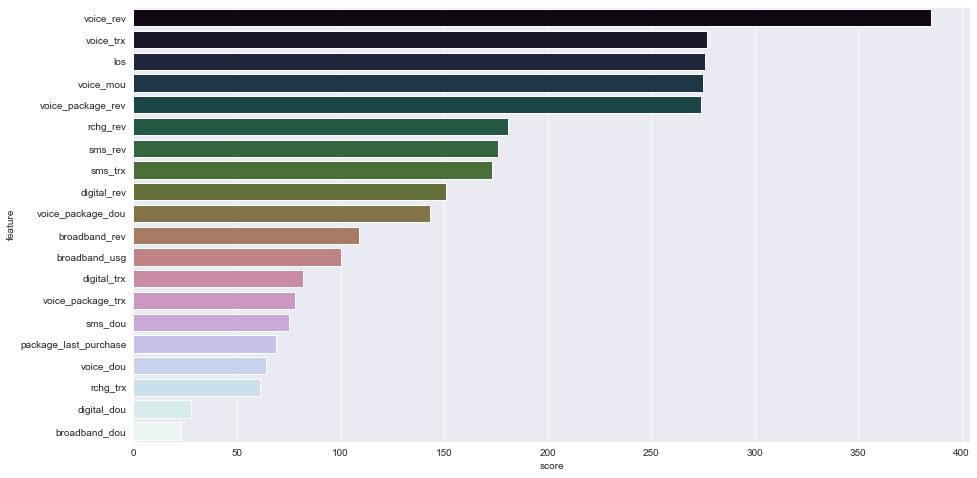

In [89]:
sns.set_style('darkgrid')
plt.figure(figsize = [15, 8])
sns.barplot(x = 'score', y = 'feature', data = feature_importance, palette = 'cubehelix')

In [94]:
feature_fix = list(feature_importance[feature_importance['score'] >= 50].iloc[:, 1])
feature_fix

# >= 200, >= 100, >= 50

['voice_rev',
 'voice_trx',
 'los',
 'voice_mou',
 'voice_package_rev',
 'rchg_rev',
 'sms_rev',
 'sms_trx',
 'digital_rev',
 'voice_package_dou',
 'broadband_rev',
 'broadband_usg',
 'digital_trx',
 'voice_package_trx',
 'sms_dou',
 'package_last_purchase',
 'voice_dou',
 'rchg_trx']

In [93]:
feature_importance[feature_importance.score >= 50].to_csv('D:/featureimportance.csv', index = False)

In [61]:
X_train.get(key = feature_fix)
model = LGBMClassifier(random_state = 2)
model.fit(X_train.get(key = feature_fix), Y_train)
Y_pred_fix = model.predict(X_test.get(key = feature_fix))
Y_pred_fix

hasil_fix3 = pd.concat([data_test[['MSISDN']], pd.DataFrame(Y_pred_fix)], axis = 1)
hasil_fix3.columns = ['MSISDN', 'lapsed_flag']
hasil_fix3.to_csv('D:/lgbm_featureimportance3.csv', index = False)
hasil_fix3.head()

,MSISDN,lapsed_flag
0,3,0
1,10,0
2,12,0
3,23,0
4,27,0


In [36]:
len(x)

20

In [95]:
cross_val_score(LGBMClassifier(random_state = 2), 
                X_train.get(key = feature_fix), 
                Y_train, 
                cv = KFold(5), scoring = 'roc_auc').mean()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8451180563490727

### Final Submission

In [46]:
model = LGBMClassifier(random_state = 2)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

hasil = pd.concat([data_test[['MSISDN']], pd.DataFrame(Y_pred)], axis = 1)
hasil.columns = ['MSISDN', 'lapsed_flag']
hasil.to_csv('D:/lgbm.csv', index = False)
hasil.head()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MSISDN,lapsed_flag
0,3,0
1,10,0
2,12,0
3,23,0
4,27,0


In [52]:
model = XGBClassifier(random_state = 2)
model.fit(X_train, Y_train)
Y_pred_xgb = model.predict(X_test)

hasil_xgb = pd.concat([data_test[['MSISDN']], pd.DataFrame(Y_pred)], axis = 1)
hasil_xgb.columns = ['MSISDN', 'lapsed_flag']
hasil_xgb.to_csv('D:/xgb.csv', index = False)
hasil_xgb.head()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MSISDN,lapsed_flag
0,3,0
1,10,0
2,12,0
3,23,0
4,27,0
